In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:

# read in train data, assuming it is stored locally
train_data = pd.read_csv("plagiarism_data/train.csv", header=None, names=None)

# labels are in the first column
y_train = train_data.iloc[:,0]
X_train = train_data.iloc[:,1:]

# read in train data, assuming it is stored locally
test_data = pd.read_csv("plagiarism_data/test.csv", header=None, names=None)

# labels are in the first column
y_test = test_data.iloc[:,0]
X_test = test_data.iloc[:,1:]

In [3]:
print(y_train.shape)
print(X_train.shape)

(70,)
(70, 3)


In [4]:
print(X_test[:5])
print(type(X_test[:1]))
print(y_test.shape)
print(X_test.shape)

          1         2         3
0  1.000000  0.901042  0.820755
1  0.765306  0.553633  0.621711
2  0.884444  0.150000  0.597458
3  0.619048  0.021739  0.427835
4  0.920000  0.328571  0.775000
<class 'pandas.core.frame.DataFrame'>
(25,)
(25, 3)


## Decision Tree Classifier
in this cell we define a Decision Tree Classifier and fit it on our train data, then we plot the decision tree created.

[Text(0.625, 0.875, 'X[1] <= 0.01\nentropy = 0.971\nsamples = 70\nvalue = [28, 42]'),
 Text(0.5, 0.625, 'X[2] <= 0.334\nentropy = 0.672\nsamples = 34\nvalue = [28, 6]'),
 Text(0.25, 0.375, 'X[0] <= 0.515\nentropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.125, 0.125, 'entropy = 0.629\nsamples = 19\nvalue = [16, 3]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.375, 'X[2] <= 0.362\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36]')]

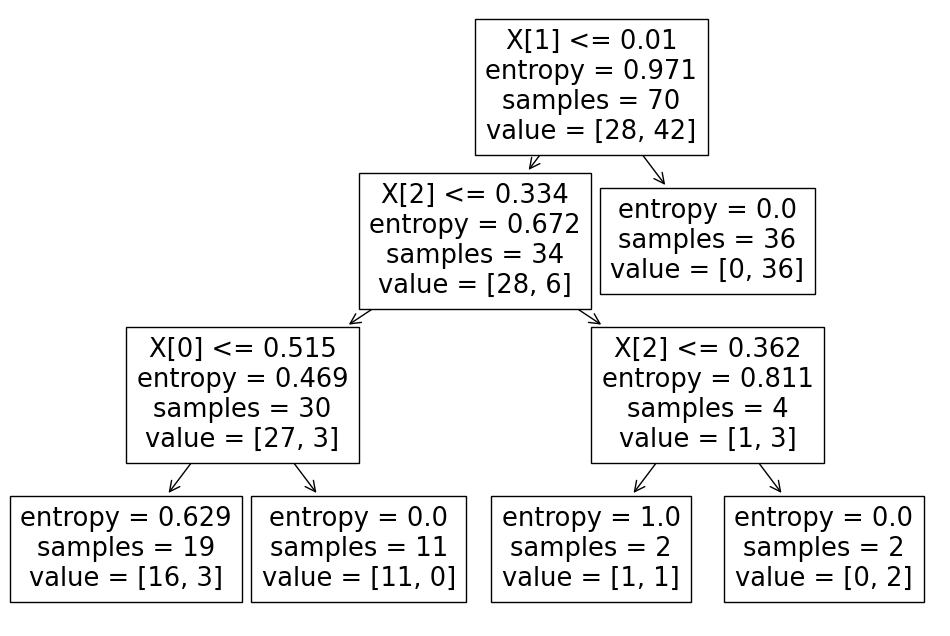

In [5]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    
plt.figure(figsize=(12,8))

# train the model and plot 
tree.plot_tree(clf_en.fit(X_train, y_train))
    

# Test model on test data

In [6]:
y_pred_en = clf_en.predict(X_test)

# Compare results

In [7]:
print(y_test.tolist())
print(y_pred_en.tolist())

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]


## Our Model Accuracy

In [8]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9600


## Save Model

In [10]:
from joblib import dump, load

dump(clf_en, 'pretrained model/saved_model_v1.joblib')  # change the version if you did modify anything

['pretrained model/saved_model_v1.joblib']